In [12]:
"""
Genetic Algorithm
    1. create an initial population
    2. Test the population
    3. Pick the best
    4. reproduction (crossover)
    4. mutate them to create next generation
"""

'\nGenetic Algorithm\n    1. create an initial population\n    2. Test the population\n    3. Pick the best\n    4. reproduction (crossover)\n    4. mutate them to create next generation\n'

In [13]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [14]:
#class defining a knapsnack item
class knp_object:
    profit = 0
    size = 0

    def __init__(self, p, s):
        self.profit = p
        self.size = s

#class defining an organism
class organism:
    binString = None
    evalScore = 100
    def __init__(self, b, e):
        self.binString = b
        self.evalScore = e
    

In [18]:
#hardcoded object list
#the maximum value for this arrangement is 63
objList = []
objList.append(knp_object(4, 5))
objList.append(knp_object(5, 4))
objList.append(knp_object(3, 5))
objList.append(knp_object(1, 3))
objList.append(knp_object(1, 5))
objList.append(knp_object(3, 1))
objList.append(knp_object(1, 1))
objList.append(knp_object(5, 3))
objList.append(knp_object(3, 2))
objList.append(knp_object(4, 1))
objList.append(knp_object(5, 4))
objList.append(knp_object(3, 2))
objList.append(knp_object(1, 1))
objList.append(knp_object(4, 5))
objList.append(knp_object(2, 1))
objList.append(knp_object(2, 4))
objList.append(knp_object(4, 5))
objList.append(knp_object(4, 4))
objList.append(knp_object(4, 4))
objList.append(knp_object(5, 3))
objList.append(knp_object(4, 2))
objList.append(knp_object(5, 3))
objList.append(knp_object(2, 3))
objList.append(knp_object(5, 1))
objList.append(knp_object(2, 1))
objList.append(knp_object(3, 4))
objList.append(knp_object(5, 2))
objList.append(knp_object(5, 1))
objList.append(knp_object(2, 1))
objList.append(knp_object(4, 1))
print(len(objList))


30


In [22]:
knp_size = 30
genSize = 100
Gen = []
testScores = []
genNum = 200
count = 0
avgScoreList = []
maximum = {"binary string": [], "profit": 0}

# #create 30 random knapsnack objects (size and profit can be from 1 to 5)
# for i in range(30):
#     newObj = knp_object(random.randint(1, 5), random.randint(1, 5))
#     objList.append(newObj)

#initial population
for i in range(genSize):
    num = 0
    for j in range(30):
        if random.randint(0, 1) == 1:
            num = num + pow(2, j)
    # i = i + pow(2, 30)
    Gen.append(organism(f'{num:0{knp_size}b}', None))


while True:
    avg = 0
    #Evaluate the population
    for g in Gen:
        totalProfit = 0
        totalSize = 0
        for index, i in enumerate(g.binString):
            if i == "1":
                totalProfit = totalProfit + objList[index].profit
                totalSize = totalSize + objList[index].size
        if totalSize > knp_size:
            totalProfit = 0
        g.evalScore = totalProfit
        testScores.append(g)

        #find global maximum if present
        if g.evalScore > maximum['profit']:
                maximum['profit'] = g.evalScore
                maximum['binary string'] = g.binString

        avg = avg + totalProfit

    #calculate avgerage score across generation
    avg = format(avg / len(Gen), '.2f')
    avgScoreList.append((float(avg)))
    
    if count < genNum:
        #pick the best
        bestOfGen = []
        testScores.sort(key=lambda x: x.evalScore, reverse=True)
        for index, i in enumerate(testScores):
            #reproduction (elite selection)
            if index < (int)(genSize / 2):
                bestOfGen.append(organism(i.binString, i.evalScore))
                bestOfGen.append(organism(i.binString, i.evalScore))

        #crossover
        random.shuffle(bestOfGen)
        for index, b in enumerate(bestOfGen[::2]):
            b2 = bestOfGen[index + 1]

            b_string = b.binString
            b2_string = b2.binString

            b_p1 = b_string[:14]
            b_p2 = b_string[14:]
            b2_p1 = b2_string[:14]
            b2_p2 = b2_string[14:]

            b.binString = b2_p1 + b_p2
            b2.binString = b_p1 + b2_p2

        #mutate organisms (randomly change one character in the binary string)
        for g in bestOfGen:
            charList = list(g.binString)
            randIdx = random.randint(0, 29)
            if charList[randIdx] == '0':
                charList[randIdx] = '1'
            else:
                charList[randIdx] = '0'
            
            g.binString = ''.join(charList)
        
        Gen = bestOfGen.copy()
        count = count + 1
    
    else:
        break

# print("average scores")
# print(avgScoreList)               


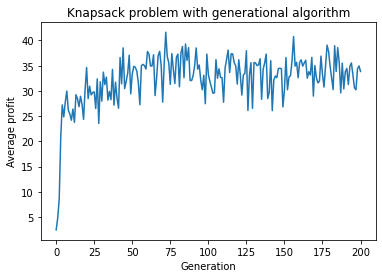

In [23]:
#graph of average scores across generations
xAxis = np.arange(0, genNum + 1)
plt.plot(xAxis,avgScoreList)
plt.title('Knapsack problem with generational algorithm')
plt.xlabel('Generation')
plt.ylabel('Average profit')
plt.show()


In [24]:
#the gloal maximum (answer to the knapsack problem)
print("binary string (where string[index] == '1' means object[index] was added to knapsack): " + str(maximum['binary string']))
print("total profit: " + str(maximum['profit']))
print("\n")

#print all items in the knapsack for reference
for index, o in enumerate(objList):
    print("Object " + str(index))
    print("profit: " + str(o.profit))
    print("size: " + str(o.size))
    print("--------------------------")

binary string (where string[index] == '1' means object[index] was added to knapsack): 000001011111101000011101101111
total profit: 63


Object 0
profit: 4
size: 5
--------------------------
Object 1
profit: 5
size: 4
--------------------------
Object 2
profit: 3
size: 5
--------------------------
Object 3
profit: 1
size: 3
--------------------------
Object 4
profit: 1
size: 5
--------------------------
Object 5
profit: 3
size: 1
--------------------------
Object 6
profit: 1
size: 1
--------------------------
Object 7
profit: 5
size: 3
--------------------------
Object 8
profit: 3
size: 2
--------------------------
Object 9
profit: 4
size: 1
--------------------------
Object 10
profit: 5
size: 4
--------------------------
Object 11
profit: 3
size: 2
--------------------------
Object 12
profit: 1
size: 1
--------------------------
Object 13
profit: 4
size: 5
--------------------------
Object 14
profit: 2
size: 1
--------------------------
Object 15
profit: 2
size: 4
---------------------